In [291]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load in the Data
data = pd.read_csv("./data/spotify_millsongdata.csv")

# Split test set
data, data_test = train_test_split(data, test_size = .8)

columns = ['artist', 'song', "text"]
data = data.loc[:, ['artist', 'song',"text"]]

# Preview the data before modifying it
print("===== Data Before Processing ====")
print(data.shape,"\n", data.head())

# Divide the data into the response (artist) versus the words
X_full, y_full = data.copy().drop(['song', 'text', 'artist'], axis=1), data["artist"]

===== Data Before Processing ====
(11530, 3) 
             artist                 song  \
14447  Norah Jones             Beatiful   
45913  Nina Simone    Rags And Old Iron   
35046    Hank Snow  Folsom Prison Blues   
40687         Kiss              Move On   
24772  The Beatles         I'll Be Back   

                                                    text  
14447  Don't look at me  \r\n  \r\nEveryday is so won...  
45913  Rags old iron rags old iron  \r\nAll he was bu...  
35046  I hear that train a-commin', it's rollin' arou...  
40687  Mmm, yeah  \r\nWhen I was just a baby, mama sa...  
24772  You know, if you break my heart I'll go  \r\nB...  


In [ ]:
# 1. Modify the data for a selected subset of the artists
artists = ["Eminem", "Metallica", "Rihanna", "Taylor Swift"]

def subset_data(X_full, y_full, classes):
    """
    take a subset of the data that corresponds to the values in the list, classes
    """
    cols = X_full.columns
    X_full = X_full.to_numpy()
    y_full = list(y_full.to_numpy())

    # copy over data entries corresponding to the correct author
    X, y = [], []
    for i in range(len(X_full)):
        if y_full[i] in artists:
            X.append(X_full[i])
            y.append(y_full[i])
    return pd.DataFrame(X, columns = cols), y

X, y = subset_data(X_full, y_full, artists)
# print(y)

In [ ]:
# 2. Modify the text data and Standardize
from sklearn.preprocessing import StandardScaler
# Turn text lower case and remove punctuation
data["text"] = data["text"].str.lower().str.replace('[^\w\s]','')
data_copy = data.copy() # save a copy of the data in solid string form
data["text"] = data["text"].str.strip().str.split() #remove unnecessary spaces and turn into a list of words

# Create a new dataframe with word frequencies of all words in the dataframe
word_count_data = data_copy.copy().text.str.split(expand=True).stack().value_counts().reset_index()
word_count_data.columns = ['Word', 'Count']

# Visualize the distributions of words accross authors / standardize data
top_unstandardized_words = list(word_count_data['Word'])[:100] # determine the top 1000 word counts as features
X.plot.hist(column = top_unstandardized_words[:10], bins=100, alpha=0.5, xlim =(0,80)) #plot the distribution of the top words


# Standardize the data
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)

X_scaled.plot.hist(column = top_unstandardized_words[:10], bins=100, alpha=0.5, xlim =(0,5)) #re-plot the distribution of the top words


In [292]:
# 3. Process the Song Lyrics
# Turn text lower case and remove punctuation
data["text"] = data["text"].str.lower().str.replace('[^\w\s]','')
data_copy = data.copy() # save a copy of the data in solid string form
data["text"] = data["text"].str.strip().str.split() #remove unnecessary spaces and turn into a list of words


# Add Features to the data
# top_words = list(word_count_data['Word'])[:100] # determine the top 1000 word counts as features
data["total_words"] = [len(lyrics) for lyrics in data['text'].tolist()] # word counts
for word in top_words:
    data[word] =  data["text"].map(lambda x: x.count(word))
print("\n\n===== Data With Word Counts ====\n", data.head(), "\n data shape:", data.shape)



/var/folders/tt/3pycs2310q194f1lhy4x0m840000gn/T/ipykernel_26435/2901722164.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["text"] = data["text"].str.lower().str.replace('[^\w\s]','')




===== Data With Word Counts ====
             artist                 song  \
14447  Norah Jones             Beatiful   
45913  Nina Simone    Rags And Old Iron   
35046    Hank Snow  Folsom Prison Blues   
40687         Kiss              Move On   
24772  The Beatles         I'll Be Back   

                                                    text  total_words  the  \
14447  [dont, look, at, me, everyday, is, so, wonderf...          247   10   
45913  [rags, old, iron, rags, old, iron, all, he, wa...          246    1   
35046  [i, hear, that, train, acommin, its, rollin, a...          174    3   
40687  [mmm, yeah, when, i, was, just, a, baby, mama,...          242    4   
24772  [you, know, if, you, break, my, heart, ill, go...          165    2   

       you   i  and  to  a  ...  been  day  could  little  man  where  theres  \
14447    9   3    4   3  0  ...     0    0      0       0    0      0       0   
45913    3   4    8   4  3  ...     0    0      1       0    3      0     

/var/folders/tt/3pycs2310q194f1lhy4x0m840000gn/T/ipykernel_26435/2901722164.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[word] =  data["text"].map(lambda x: x.count(word))
/var/folders/tt/3pycs2310q194f1lhy4x0m840000gn/T/ipykernel_26435/2901722164.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[word] =  data["text"].map(lambda x: x.count(word))
/var/folders/tt/3pycs2310q194f1lhy4x0m840000gn/T/ipykernel_26435/2901722164.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

<AxesSubplot:ylabel='Frequency'>

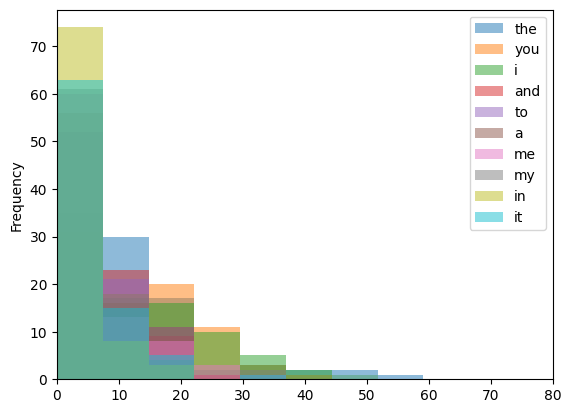

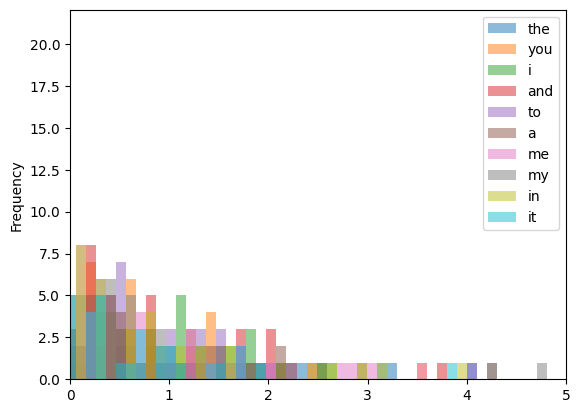

In [294]:
# 2. Standardize the Data
from sklearn.preprocessing import StandardScaler

# Visualize the distributions of words accross authors / standardize data
X.plot.hist(column = top_words[:10], bins=100, alpha=0.5, xlim =(0,80))

# Standardize the data
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)

X_scaled.plot.hist(column = top_words[:10], bins=100, alpha=0.5, xlim =(0,5))


# Understanding/Processing the Data
## 1. Processing the Song Lyrics
Initially, the data just has each artist, the song title, and the song lyrics for that entire song. In order to process the data, I used a Bag-of-words, technique, to make new features for the counts of each word in the song. Since the songs had a wide range of words, I chose to focus in on the top words that occurred (after standardization!). 

## 2. Narrowing in on a subset of the artists
Because my goal is to classify different artists based off their song lyrics, I decided to focus in on a smaller subset of artists that I thought represent different genres / a range of song lyrics.

## 3. Standardizing the Data
#### **Data Observations**
In plotting the distribution of the word counts, we see that each feature is skewed.  Thus we should standardize our data. Correlation: it would be likely that features are correlated as certain words tend to come up in groups (i.e, me, you, i).
Therefore, I decided to standardize the data.
*or does it make more sense to not standardize? maybe just divide each row by the number of words in the song. We still want to see which songs have a higher frequency of a certain word, but don't necessarily want to compar

**If our goals are to differentiate between artists based on the words of their songs, does it make sense to standardize the word counts?**
One thing that we can initially observe in our data, is the most frequent words across songs are words like: the, you, i, and, to, a. However, these words are frequent in the english language in general. It's possible that other words are more indicative of who the artists are that we aren't getting by just focusing in on the top words that occur across all songs. 

Additionally, it makes sense to do some dimension reduction, as it's likely that a lot of the words are correlated (ex: words like me and you could be highly correlated)

---

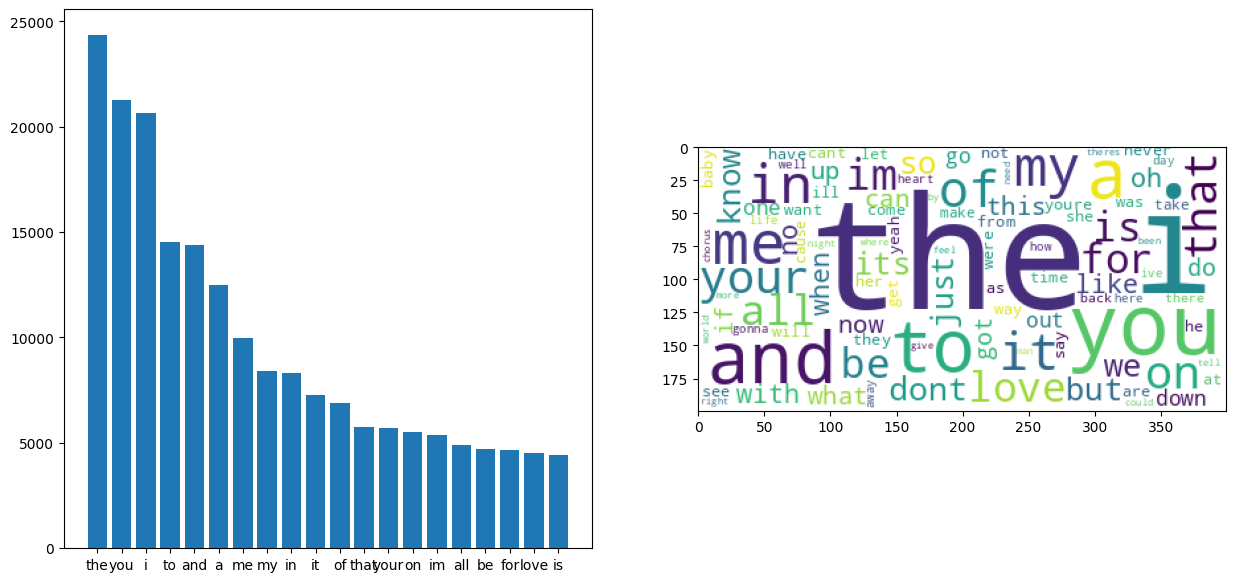

Eminem  : num songs =  11


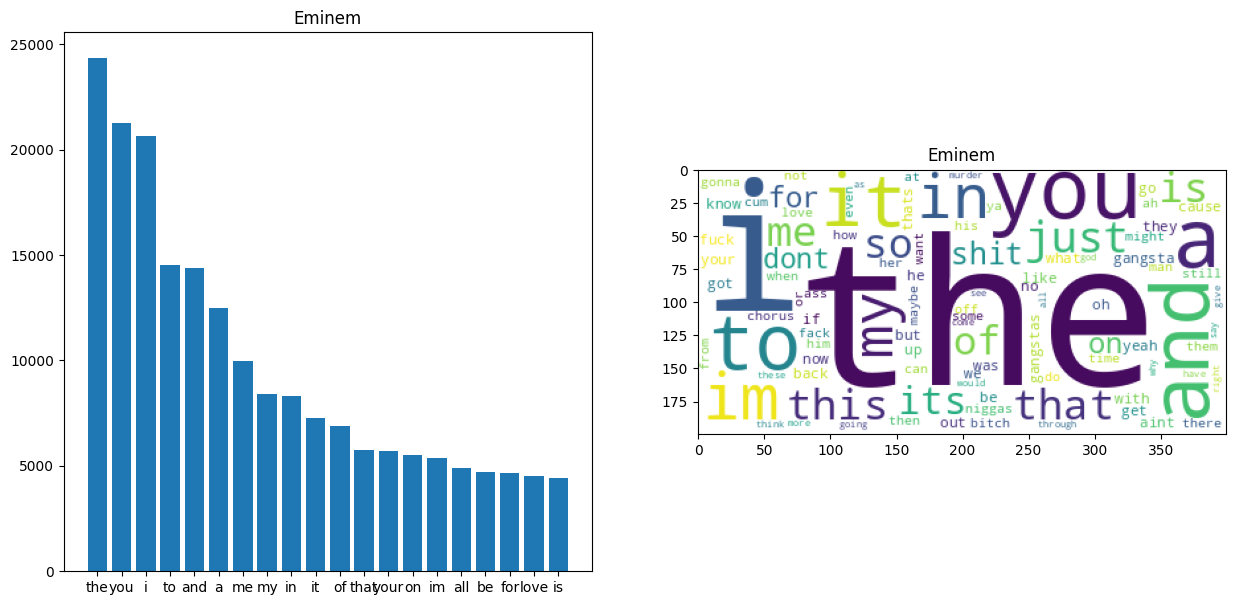

Metallica  : num songs =  27


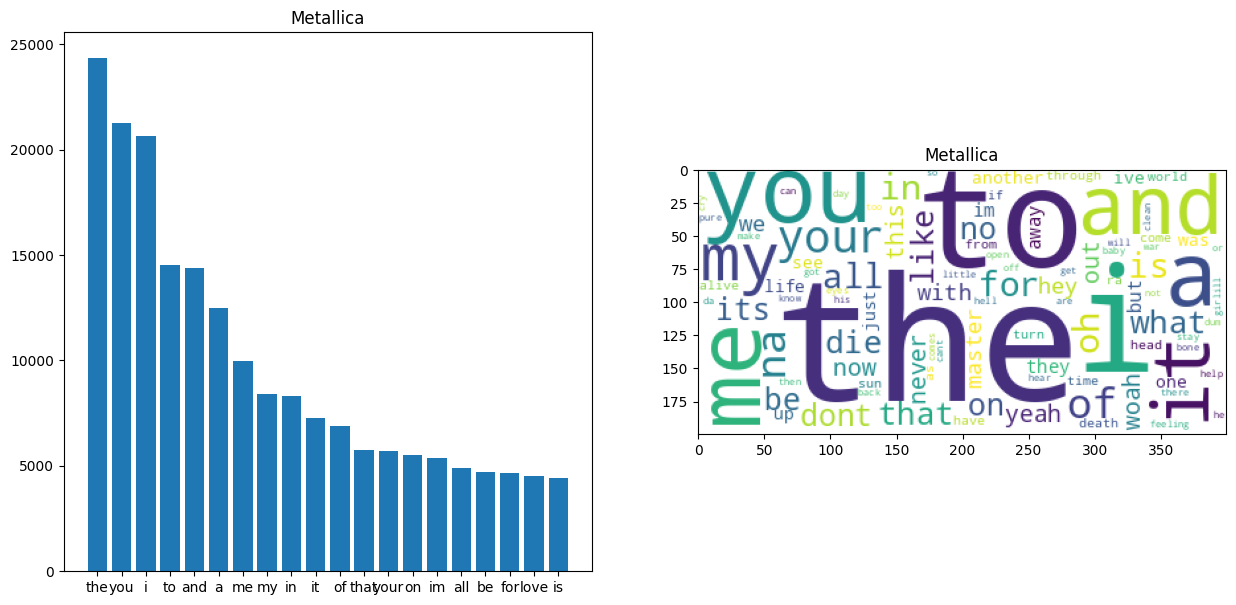

Rihanna  : num songs =  30


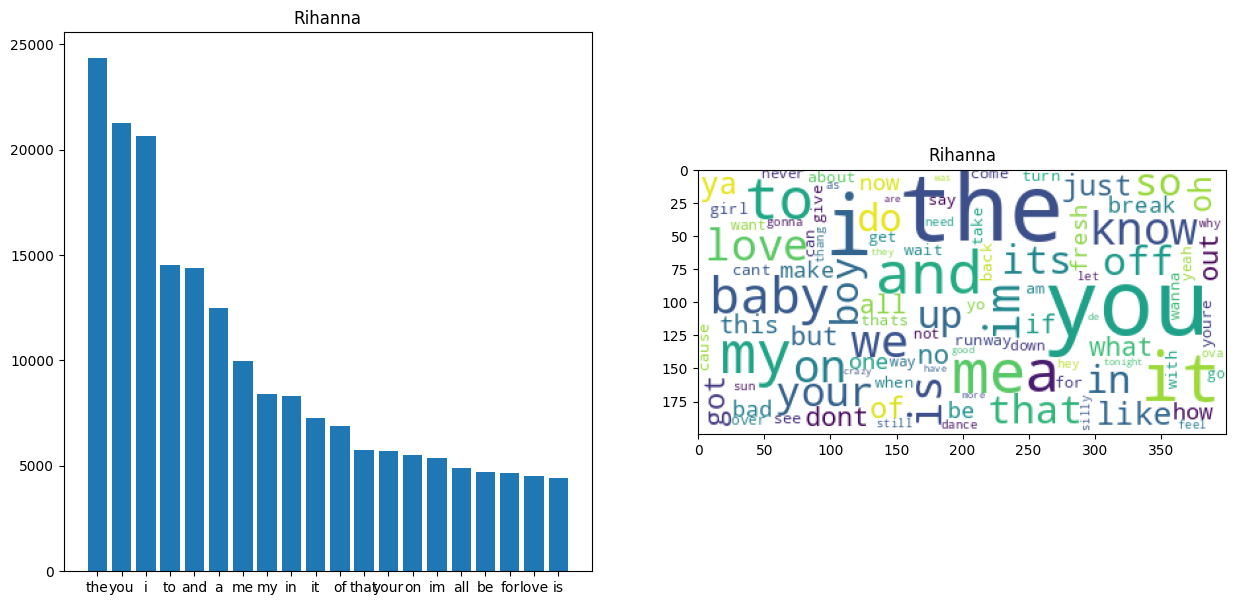

Taylor Swift  : num songs =  16


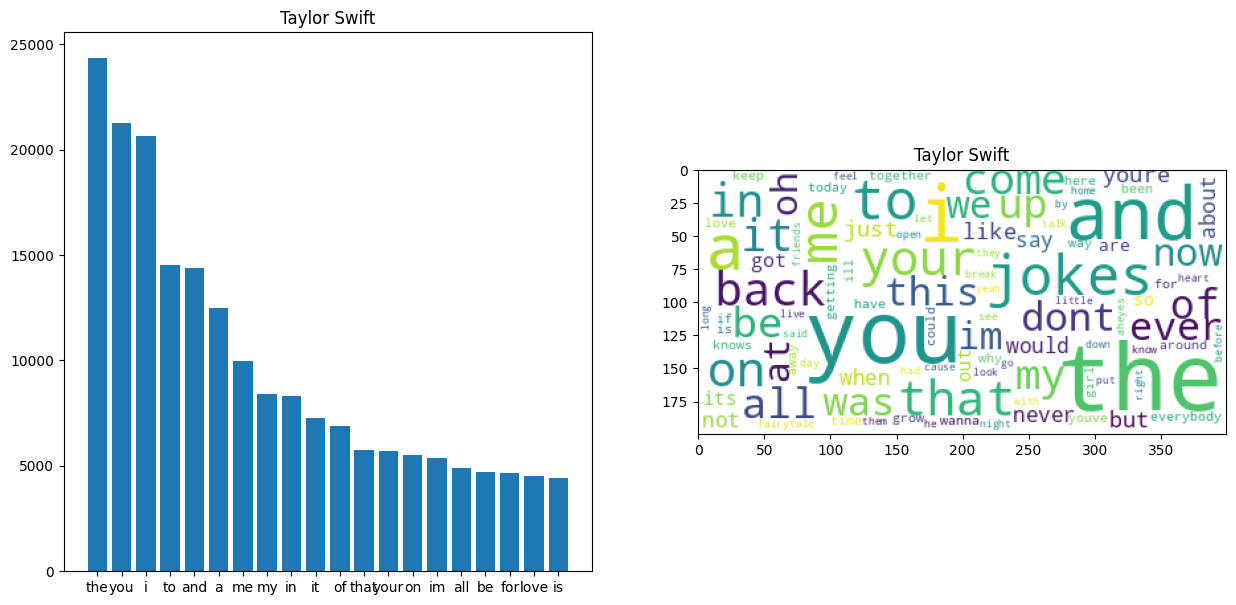

In [276]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import operator

def get_word_counts(artist = None):
    """
    Gets the word counts for a given name in the data in a dictionary
    """
    if artist == None:
        artist_data = data_copy
    else:
        artist_data = data_copy[data_copy["artist"] == artist]
    word_counts = artist_data.copy().text.str.split(expand=True).stack().value_counts().reset_index()
    word_counts.columns = ['Word', 'Count']
    
    return dict(zip(word_counts['Word'].tolist(), word_counts['Count'].tolist()))

def plot_artist_words(artist = None):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,7))
    word_dict = get_word_counts(artist)

    #plot the word bar plot
    top_word_counts = dict(sorted(word_count_dict.items(), key=operator.itemgetter(1), reverse=True)[:20])
    ax1.bar(top_word_counts.keys(), top_word_counts.values())
    ax1.set_title(artist)

    #plot the word cloud
    word_cloud = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words = 100).generate_from_frequencies(word_dict)
    ax2.imshow(word_cloud)
    ax2.set_title(artist)
    plt.show()

# Create a word cloud and bar chart of all of the words in the songs
plot_artist_words()

# # Sort the artists by the number of songs in the database
# artists = list(set(data["artist"])) # unique artist list
# artists_sorted = sorted(artists, key = lambda x: list(data["artist"]).count(x), reverse = True)

# # Preview the word counts of artists ranging in "popularity"
# artists_to_preview = [artists_sorted[1], artists_sorted[int(len(artists_sorted)/3)], artists_sorted[int(len(artists_sorted)*2/3)], artists_sorted[-1]]
# artists_to_preview = ["Eminem", "Metallica", "Rihanna", "Taylor Swift"]
for artist in artists:
    print(artist," : num songs = ", list(data["artist"]).count(artist))
    plot_artist_words(artist)


In [277]:
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D

# ---------------- Helper Functions----------------

def get_color_array(labels, y):
    """ 
    Get a color array corresponding a color to each label
    """
    label_colors = {}
    cmap = plt.get_cmap('Spectral')
    colormap = cmap(np.linspace(0, 1, len(labels))) #colors for each label
    for i, label in enumerate(labels):
        label_colors[label] = colormap[i]
    color_array = [label_colors[label] for label in y]
    return color_array, label_colors

# ---------------- More Data Processing ----------------

# 2. Map artists to colors for plotting purposes
color_array, artist_colors = get_color_array(artists, y)

# ---------------- PCA Helper Functions----------------
def viz_2Dembedding(X_embedded, model_name):
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c = color_array)
    custom_points = [Line2D([0], [0] , color = artist_colors[artist] , lw = 4) for artist in artists]
    plt.legend(custom_points, artists)
    
    plt.xlabel("component 0")
    plt.ylabel("component 1")
    plt.title("Artist Words")

    plt.title(model_name + " Visualization")
    plt.show()
    plt.clf()

def viz_feature_weights(features, feature_weights, model_name):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
    ax1.bar(features, feature_weights[0][:len(features)])
    ax1.set_title("feature 1 weights")
    ax1.set_ylabel("feature weights")
    ax1.set_xlabel("words")

    ax2.bar(features, feature_weights[1][:len(features)])
    ax2.set_title("feature 2 weights")
    ax2.set_ylabel("feature weights")
    ax2.set_xlabel("words")
    plt.suptitle(model_name + " Features")
    plt.show()
    plt.clf()


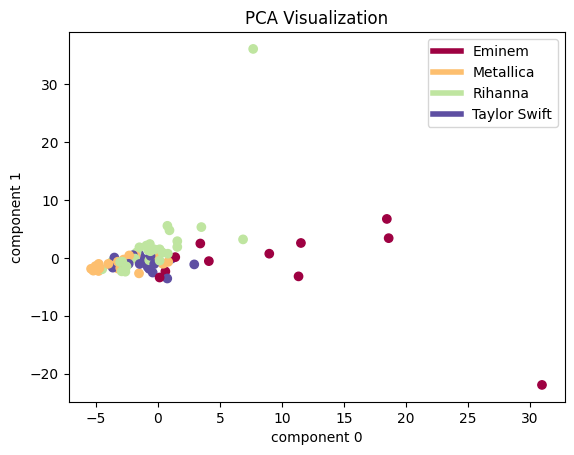

<Figure size 640x480 with 0 Axes>

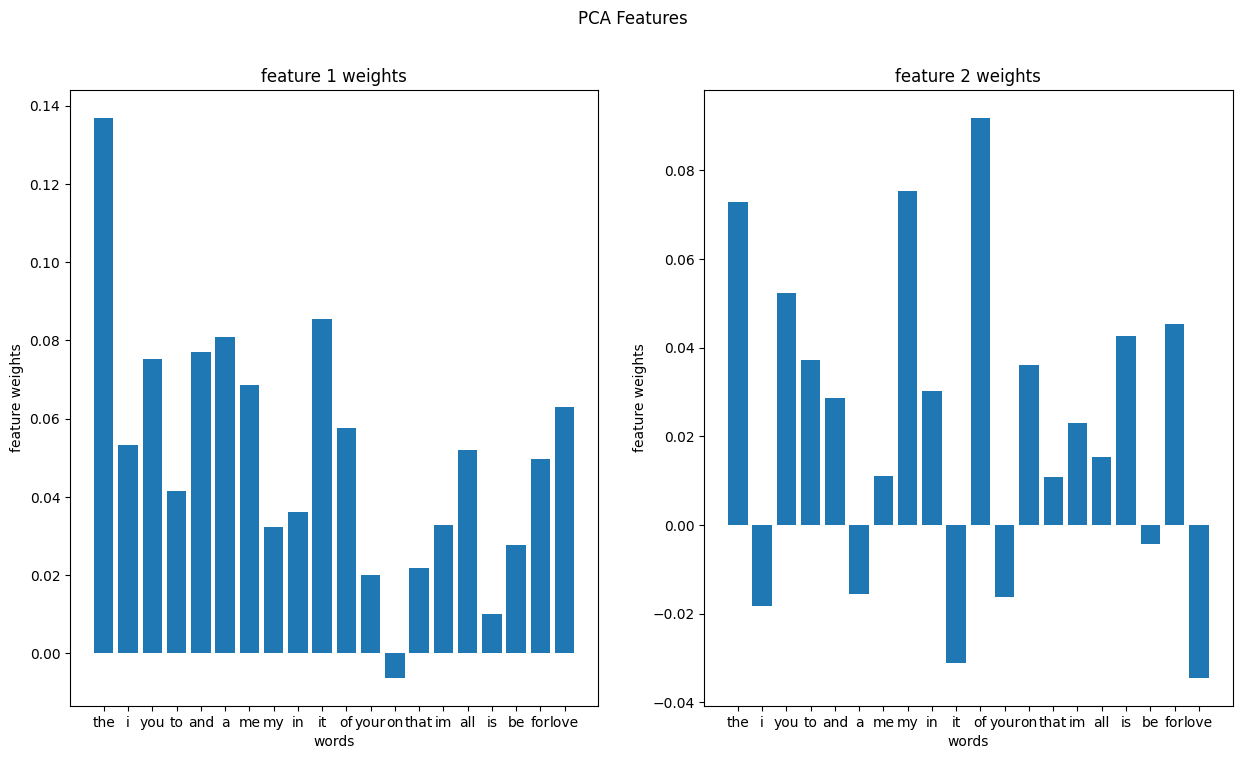

/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


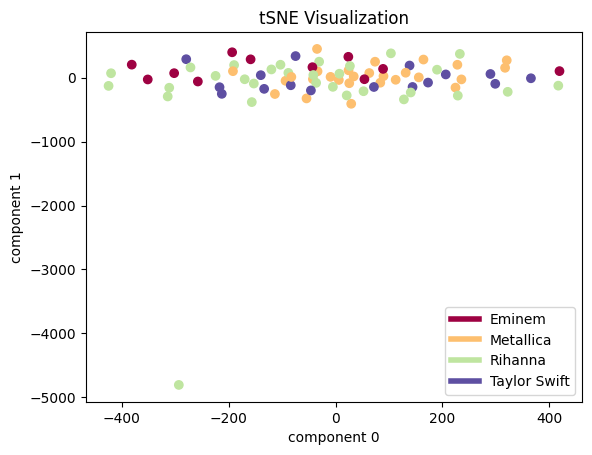

<Figure size 640x480 with 0 Axes>

In [279]:
# UNSUPERVISED LEARNING / EXPLORING THE DATA
words_to_viz = top_words[:20]

# PCA Embedding
model = PCA(n_components = 2)
X_embedded = model.fit_transform(X)
viz_2Dembedding(X_embedded, "PCA")
viz_feature_weights(words_to_viz, model.components_, "PCA")

# # NMF Embedding
# model = NMF(n_components = 2)
# X_embedded = model.fit_transform(X)
# viz_2Dembedding(X_embedded, "NMF")
# viz_feature_weights(words_to_viz, model.components_, "NMF")

#tSNE Embedding
model = TSNE(n_components = 2)
X_embedded = model.fit_transform(X)
viz_2Dembedding(X_embedded, "tSNE")
